In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 

from utils.clustering_utils import get_colors

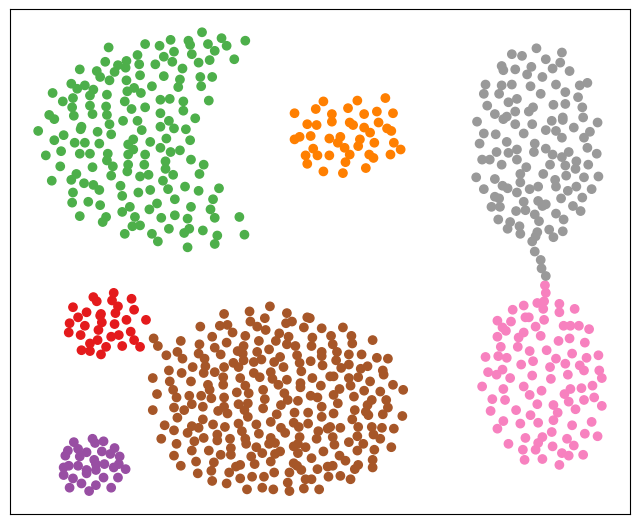

In [5]:
dataset = pd.read_csv('./data/dataset.csv')

x = dataset['x']
y = dataset['y']
labels = dataset['label']
aspect_ratio = (max(x) - min(x)) / (max(y) - min(y))

plt.figure(figsize=(8, 8 / aspect_ratio))
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.scatter(x, y, color=get_colors(labels))

plt.savefig('./data/dataset.pdf', format='pdf')

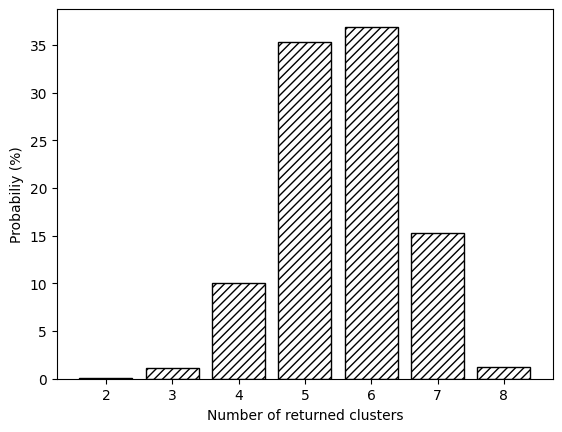

In [96]:
import json 

counts = {}
by_num = {}
with open('./fresnel/raw_results.json') as fp:
  occ = json.load(fp)
  counts = next(iter(occ.values()))['counter']

  for bitstring, count in counts.items():
    ones = bitstring.count('1')
    if ones in by_num:
      by_num[ones] += count 
    else:
      by_num[ones] = count 

pd.DataFrame(list(counts.items()), columns=['bitstrings', 'occurrences']).to_csv('./fresnel/raw_results.csv', index=False)

norm_occ = list(map(lambda x: 100 * x / sum(by_num.values()), by_num.values()))

plt.figure()
plt.bar(
  by_num.keys(), 
  norm_occ,
  color='white',
  edgecolor='black',
  hatch='////'
)
plt.xlabel('Number of returned clusters')
plt.ylabel('Probabiliy (%)')
plt.savefig('./fresnel/num_clusters.pdf', format='pdf')
  

In [41]:
{key: 100*value / sum(by_num.values()) for key, value in by_num.items()}

{7: 15.308641975308642,
 6: 36.91358024691358,
 5: 35.30864197530864,
 4: 10.0,
 3: 1.1111111111111112,
 8: 1.2345679012345678,
 2: 0.12345679012345678}

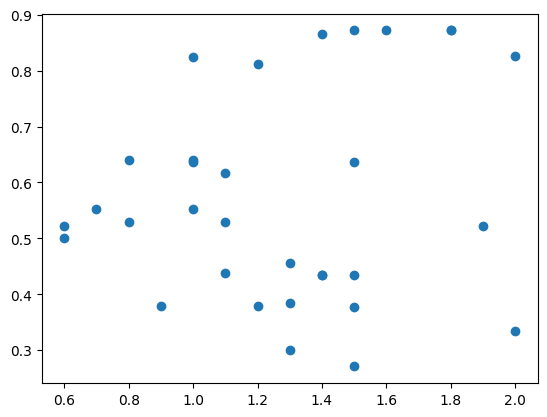

In [94]:
from sklearn.metrics import adjusted_rand_score
from utils.clustering_utils import clusters_from_bitstring
import pandas as pd 

dataset = pd.read_csv('./pulser/clusterized_dataset.csv')
clusters = pd.read_csv('./pulser/clusters.csv')

def rand_from_bitstring(bitstring, dataset, clusters):
  selected_points, _ = clusters_from_bitstring(bitstring, dataset, clusters)

  if selected_points.shape[0] == dataset.shape[0]:
    return adjusted_rand_score(dataset['label'], selected_points['label'])
  else:
    return -5

pulser = pd.read_csv('./pulser/raw_results.csv', dtype={'bitstrings': str, 'occurrences': int})
pulser['occurrences'] = pulser['occurrences'] / 10
pulser['rand'] = pulser['bitstrings'].apply(lambda b: rand_from_bitstring(b, dataset, clusters))

fresnel = pd.read_csv('./fresnel/raw_results.csv', dtype={'bitstrings': str, 'occurrences': int})
fresnel['occurrences'] = fresnel['occurrences'] / 10
fresnel['rand'] = fresnel['bitstrings'].apply(lambda b: rand_from_bitstring(b, dataset, clusters))

valid_pulser = pulser.loc[pulser['rand'] > -5]

plt.figure()
plt.scatter(valid_pulser['occurrences'], valid_pulser['rand'])
plt.show()

# plt.figure()
# plt.bar(
#   ['DBSCAN', 'Spectral Clustering'], 
#   [adjusted_rand_score(pulser['label'], pulser['DBSCAN']), adjusted_rand_score(pulser['label'], pulser['Spectral Clustering'])],
#   color='grey',
#   # edgecolor='black',
#   # hatch='....'
# )
# plt.show()


In [110]:
pulser['returned_clusters'] = pulser['bitstrings'].apply(lambda b: b.count('1')).astype(str)
prob_by_num = pulser.groupby('returned_clusters', as_index=False)['occurrences'].sum()

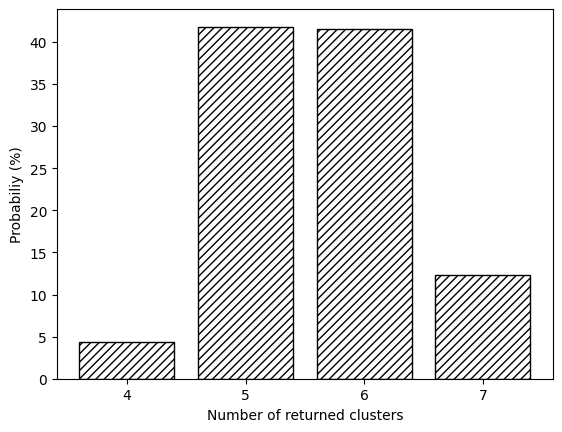

In [114]:
plt.figure()
plt.bar(
  prob_by_num['returned_clusters'], 
  prob_by_num['occurrences'],
  color='white',
  edgecolor='black',
  hatch='////'
)
plt.xlabel('Number of returned clusters')
plt.ylabel('Probabiliy (%)')
plt.show()
# plt.savefig('./pulser/pulser_num_clusters.pdf', format='pdf')

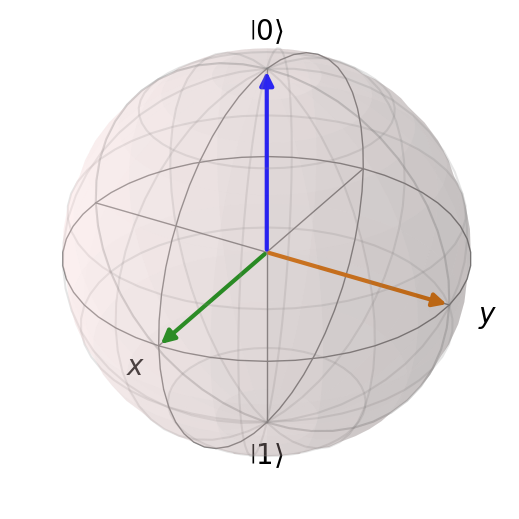

In [126]:
import qutip 

b = qutip.Bloch() 

b.make_sphere()
vec = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
b.add_vectors(vec)
b.render()
b.show()